<font size="-1">FALL 2022
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="60px" align="right">
 </br>
<font size="-01">CIE 457, Statistical inference and data analysisCity</font>

<font size="-1">University of Science and Technology, Zewail City</font>

<br>

<h1 align="center">Assignment 6: </h1>
<h2 align="center">Linear regression analysis</h2>

---

<br>

<h4><font color='orange'><ins> <center>DO NOT use any ready-made functions or libraries in this assignment.

# Q1: Download the [WHO life expectency dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download) from kaggle:

- Inspect the data, assess its quality, and do any
cleaning/ pre-processing steps you see necessary. List your steps.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Life Expectancy Data.csv')
print(df.info())
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Get summary statistics for numeric columns
print(df.describe())


              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [ ]:

# View the first few rows of the data
print(df.head(1))
df.columns

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS        GDP  Population  \
0    6.0               8.16         65.0        0.1  584.25921  33736494.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  

[1 rows x 22 columns]


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:

# Check for missing values
print(df.isnull().sum())

df.columns

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# Handle missing values
df['Life expectancy '] = df['Life expectancy '].fillna(df['Life expectancy '].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['Diphtheria '] = df['Diphtheria '].fillna(df['Diphtheria '].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df[' thinness  1-19 years'] = df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean())
df[' thinness 5-9 years'] = df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean())
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())
df[' BMI '] = df[' BMI '].fillna(df[' BMI '].mean())
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# Q2: Visualize the relationship between the average life expectancy and all other variables in the dataset.
-  Describe any trends you see, if any.

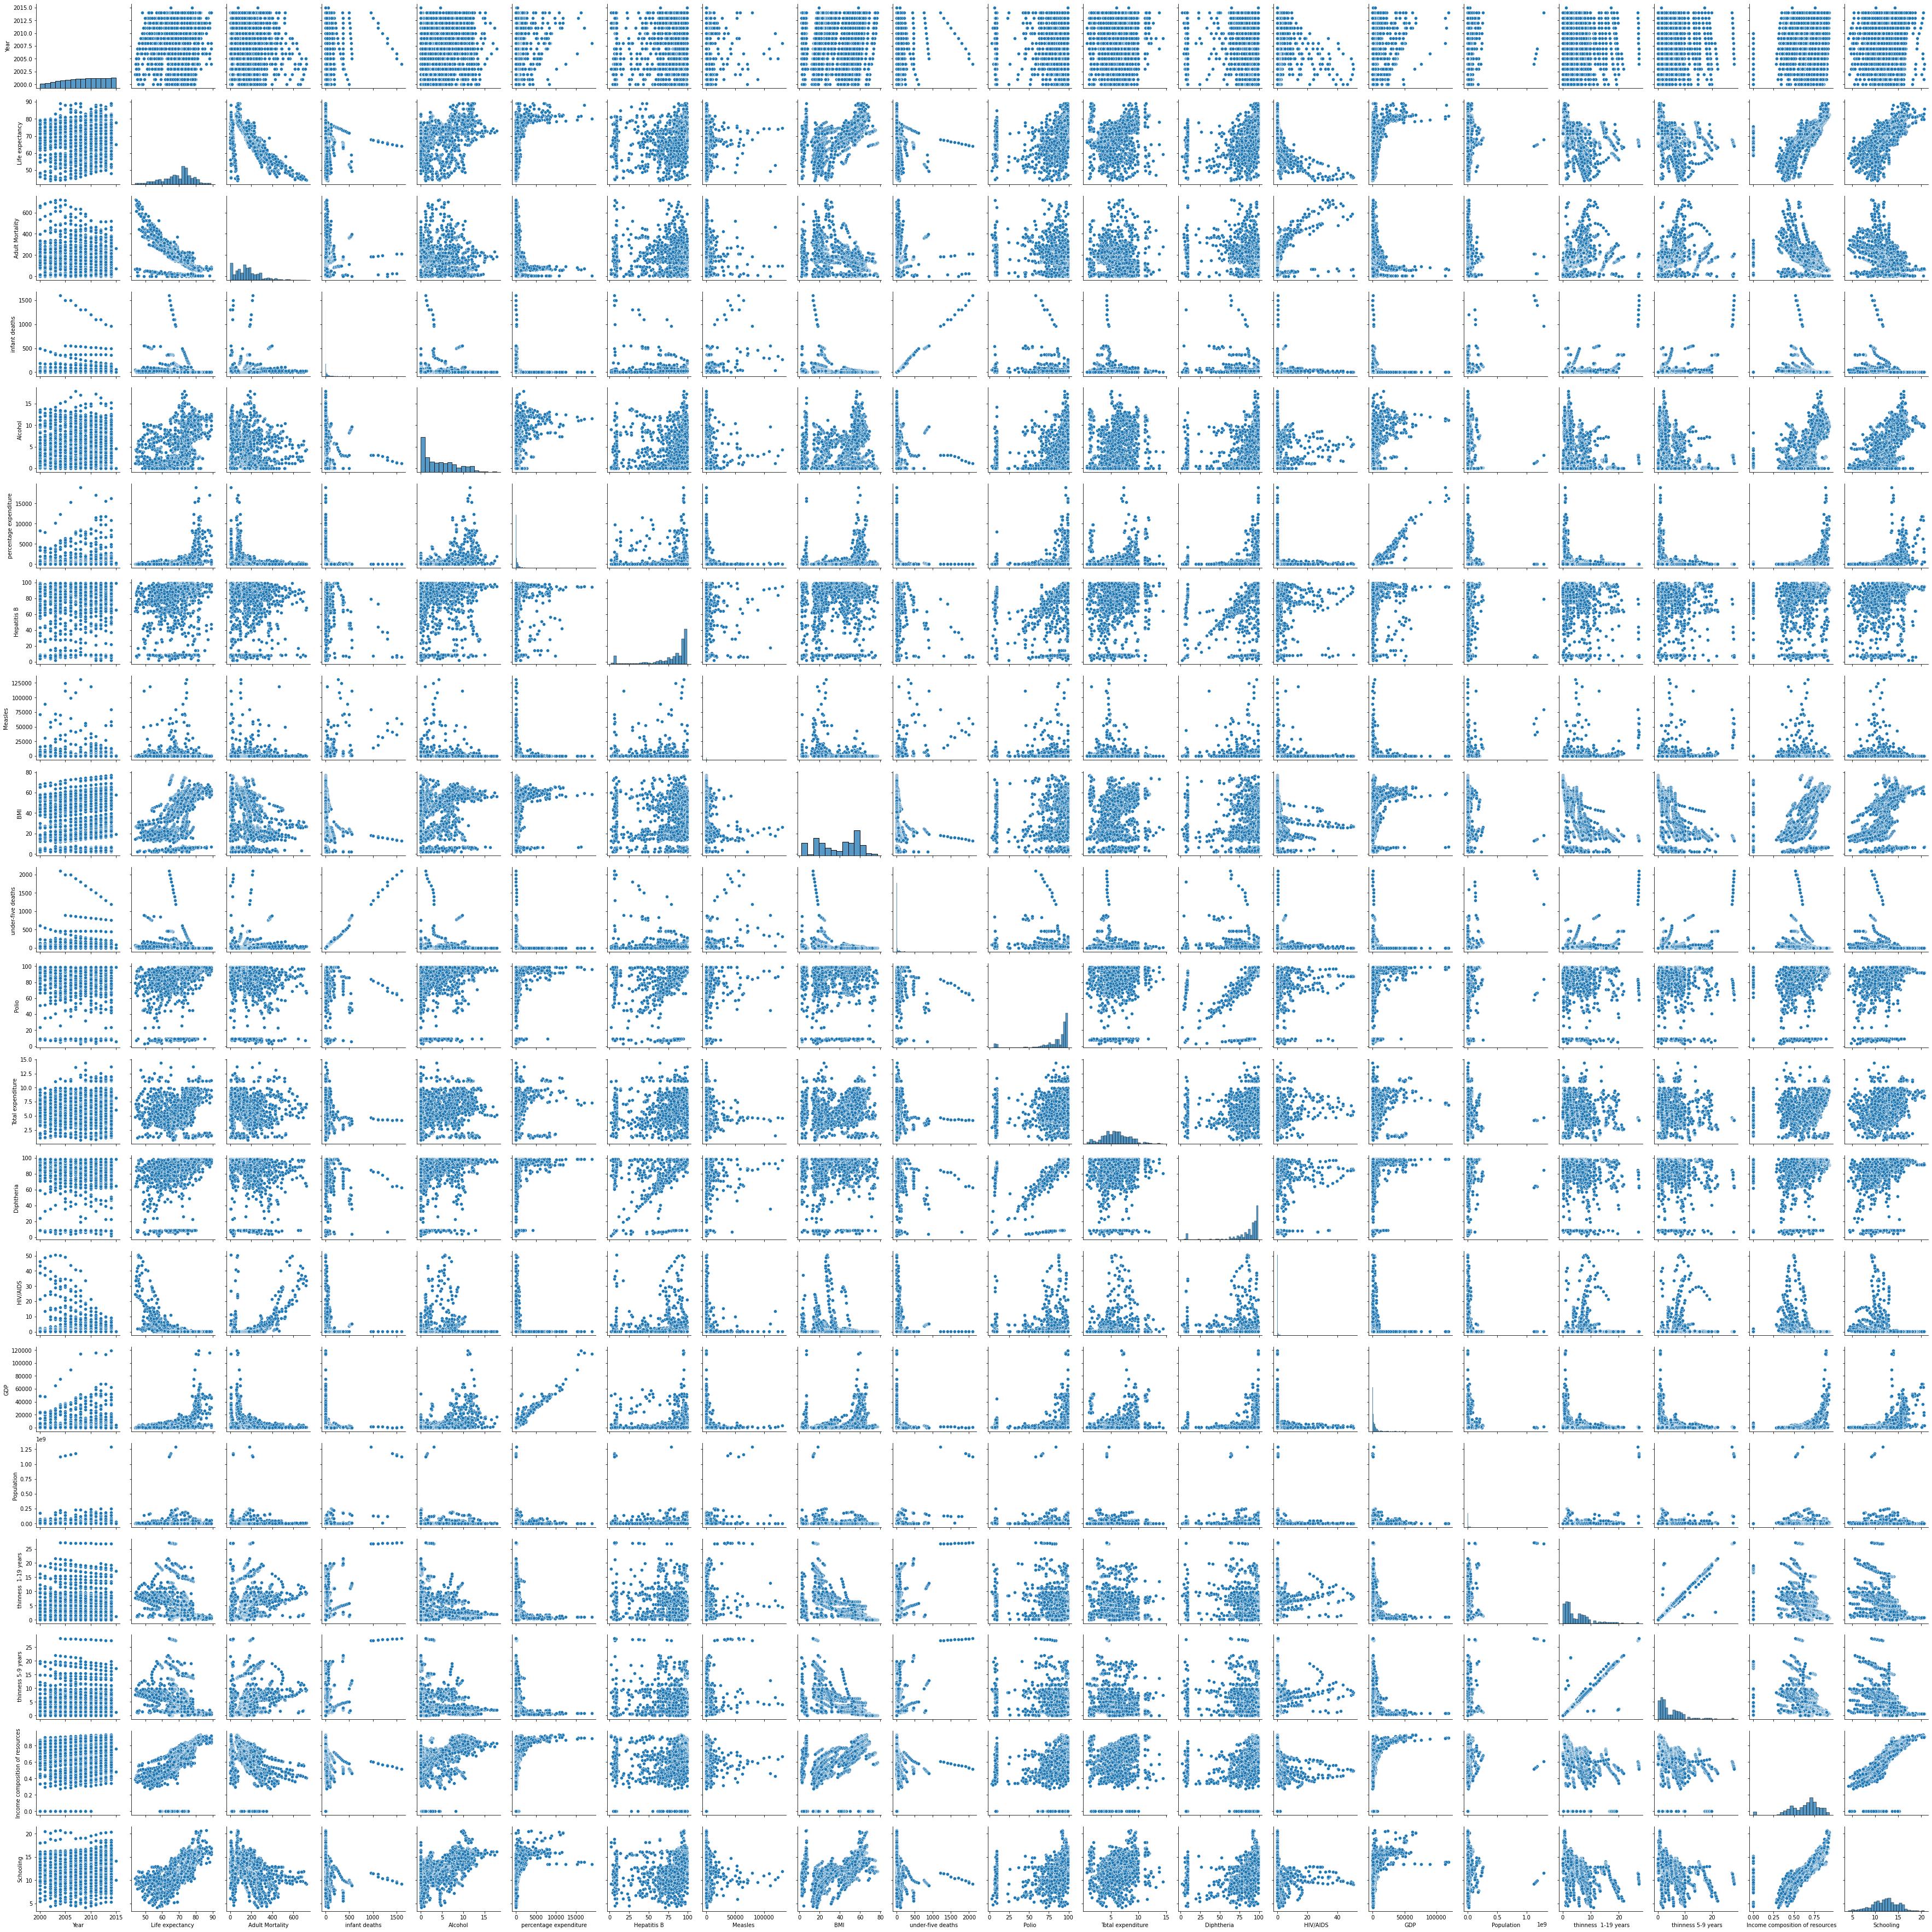

In [ ]:
columns_of_interest = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

import seaborn as sns
sns.pairplot( df[columns_of_interest] )

# Q3: Implement a class 'MLR_model' that has the following finctionalities:
- Takes an X,Y dataset as an input at instantiation.
- Has a method to estimate the coefficients from X, and Y.
- Has a method to predict the y estimates given an array of X values.
- Has a method to calculate the R-squared statistic.
- Has a method to calculate the standard errors of the beta estimates.
- Has a method that finds a confidence interval around the point estimates of the coefficients, given a confidence level as input.
-Has a method that implements a significance t-test about the coefficient values ($H_0: β_i = 0$), and returns the t-statistics and the p-values.
- Has a method "summary" that prints out the following in a well-formatted way:
    * R-squared.
    * The predictor variable names along with:
    * their coefficients,
    * confidence intervals,
    * standard errors,
    * t-statistic values,
    * and p-values.

In [ ]:
class MLR_model():
    def __init__(self,Y,X):
        self.Y = Y
        self.X = X
        #self.r , self.c = X.shape
        self.coef_ = self.estimate_betas()
        #self.se_ = self.standard_errors_of_betas()
        #self.conf_int_ = self.confidence_intervals()

    def estimate_betas(self):
        return np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.Y

    def estimate_y_hat(self,X_new):
         return X_new @ self.coef_


    def R_squared(self):
        y_hat = self.X @ self.coef_
        y_mean = np.mean(self.Y)
        sst = np.sum((self.Y - y_mean)**2)
        sse = np.sum((y_hat - self.Y)**2)
        return 1 - sse/sst

    def standard_errors_of_betas(self ):
        y_hat = self.estimate_y_hat(self.X)
        #r,c= self.X.shape
        mse = ((self.Y - y_hat) ** 2).sum() / (X.shape(axes=0) - X.shape(axes=1) - 1)
        vcov = mse * np.linalg.inv(self.X.T @ self.X)
        return np.sqrt(np.diagonal(vcov))

    def confidence_intervals(self, conf_level=95):
        t_value = stats.t.ppf((1 + conf_level) / 2, self.r - self.c)
        return t_value * self.se_


    def significance_t_test(self):
        betas = self.coef_
        se = self.standard_errors_of_betas()
        t_value = stats.t.ppf(conf_level / 100, df=len(self.Y) - len(betas) - 1)
        return betas - t_value * se, betas + t_value * se

    def summary(self):
        print(f"R-squared: {self.R_squared():.4f}")
        for i, col in enumerate(self.X.columns):
            conf_int = self.confidence_intervals()
            t_value, p_value = self.significance_t_test()
            print(f"{col}:")
            print(f"\tCoefficient: {self.coef_[i]:.4f}")
            print(f"\tConfidence interval: ({self.coef_[i] - conf_int[i]:.4f}, {self.coef_[i] + conf_int[i]:.4f})")
            print(f"\tStandard error: {self.se_[i]:.4f}")
            print(f"\tT-value: {t_value[i]:.4f}")
            print(f"\tP-value: {p_value[i]:.4f}")
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


# Q4: Construct a multiple linear regression model between the life expectency (response) and all other variables (predictors).
- You will need to numerically encode the categorical variables to be able to use them in your model.
- Use your MLR_model class.
- print out the model summary.

In [ ]:
# Encode categorical variables
#df = pd.get_dummies(df, columns=['Country', 'Year','Status'], drop_first=True)
df = df.dropna()
# Split the data into response and predictor variables
Y = df["Life expectancy "]
X = df.drop("Life expectancy ", axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Fit the model
model = MLR_model(x_train, y_train)

# Print the summary
model.summary()

LinAlgError: ignored

# Q5: Which variables are the best predictors of life expectancy? which are the worst?
- For each variable, conduct a significance t-test with the null hypothesis that it has no effect on the response.  


In [ ]:
model.t

NameError: ignored

# Q6: Choose the best 10 predictors of life expectancy and visualize the relationship between them.
- Are any of them correlated with each other?
- When some of your predictor variables are correlated, what is this phenomenon called?
- What kind of problems can this cause for your regression model?
- How do we go about solving this issue?

# Q7: Choose the best 5 uncorrelated predictors, and fit another model for predicting the life expectancy.

* Report the new coefficients and interpret their meaning (in words).
* Calculate the $R^2$ value of the model and comment on its value.

#Q8: Revise the model by introducing a higher-order and/or interaction term.
* Which variable(s) did you use? Justify your choice.
* Calculate the $R^2$ statistic and compare it to the baseline model.

# Q9: Fit another model with no intercept term:
* Compare it to a baseline with the same variables and an intercept. which one is better?
* Why does this change in the model's performance, if any, occurs?

* What does the intercept term physically mean in this context?